In [2]:
import pandas as pd
from langdetect import detect
import matplotlib.pyplot as plt

# Load data 💽

In [48]:
df = pd.read_csv("raw.csv")

# Clean Data 🛀

Create new column to categorize the language used in each row. Drop undetectable comments.

In [115]:
df["language"] = None # create new column

undetectable = []
for idx, row in df.iterrows():
    try:
        language = detect(df['text'][idx])
        df.at[idx, 'language'] = language
    except:
        language = "error"
        undetectable.append(idx)
        df.at[idx, 'language'] = None

df = df.dropna() # drop undetectable columns

Exploration on language counts

In [117]:
print("count of language undetectable comments from dataset: ", len(undetectable))
print()

languages = df['language'].unique()
print("unique languages: ", languages)

count of language undetectable comments from dataset:  1

unique languages:  ['es' 'en' 'fi' 'lt' 'et' 'hr' 'no' 'ro' 'ar' 'nl' 'sw' 'pt' 'cy' 'it'
 'so' 'fr' 'de' 'sv' 'da' 'tl' 'lv' 'id' 'af' 'hu' 'sk' 'ca' 'fa' 'pl'
 'vi' 'tr' 'sq' 'ko' 'el' 'sl' 'ru' 'ja' 'cs' 'ur' 'bg' 'zh-cn' 'zh-tw'
 'he']


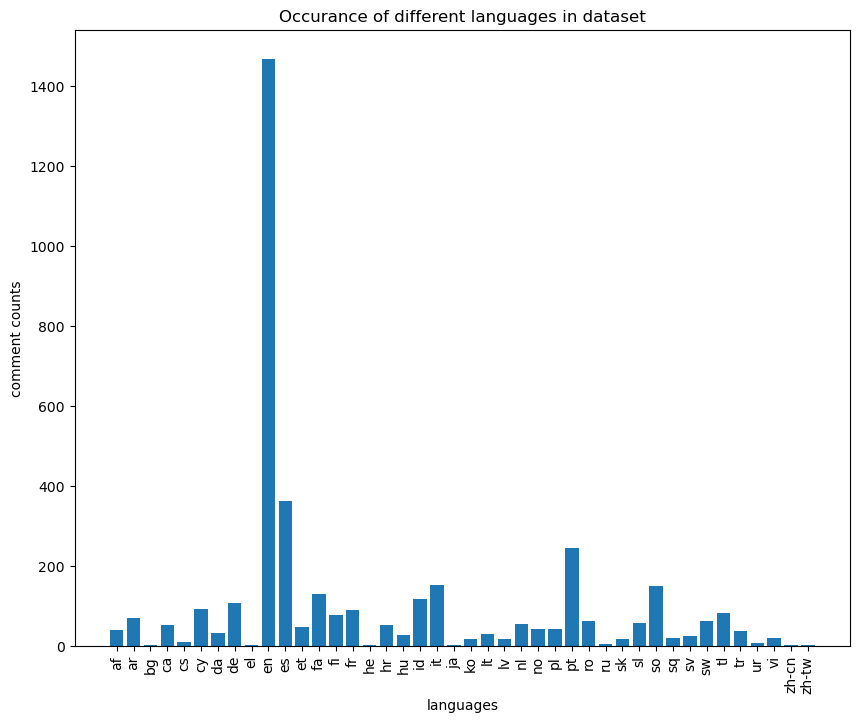

In [121]:
df2 = df.pivot_table(index='language', aggfunc='size')

plt.figure(figsize=(10, 8))
plt.bar(df2.index, df2.values)
plt.title("Occurance of different languages in dataset")
plt.xticks(rotation=90)
plt.xlabel("languages")
plt.ylabel("comment counts")
plt.show()
